# Sales Prediction Using Python

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

Step 1: Data cleaning 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
advertising = pd.read_csv('advertising.csv')

In [17]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [18]:
#checking for null values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
#checking for data types
advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [20]:
advertising.TV.describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [21]:
advertising.Radio.describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [22]:
advertising.Newspaper.describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [23]:
#checking correlation between columns:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Step 2: Data Analysis and Visualization

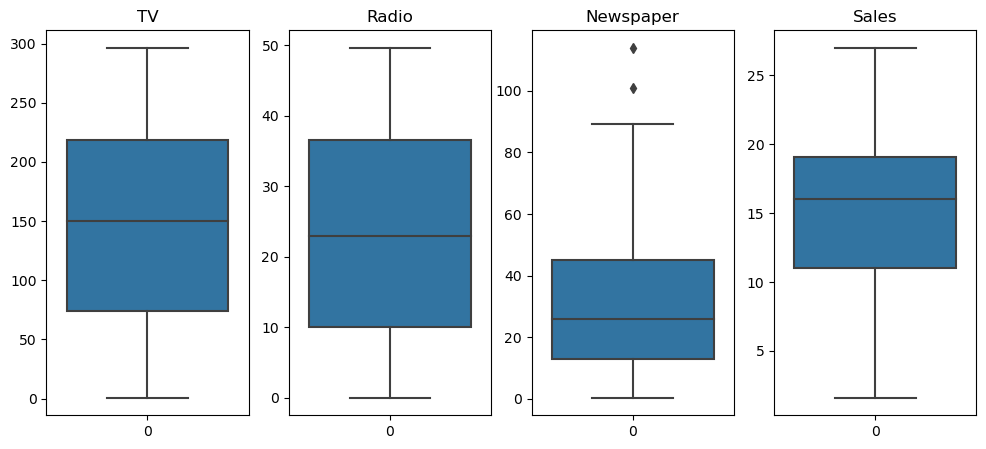

In [24]:
#checking for outliers:
plt.figure(figsize=[12,5])
plt.subplot(1,4,1)
sns.boxplot(advertising['TV'])
plt.title('TV')

plt.subplot(1,4,2)
sns.boxplot(advertising['Radio'])
plt.title('Radio')

plt.subplot(1,4,3)
sns.boxplot(advertising['Newspaper'])
plt.title('Newspaper')

plt.subplot(1,4,4)
sns.boxplot(advertising['Sales'])
plt.title('Sales')
plt.show()

There are no outliers present in data 

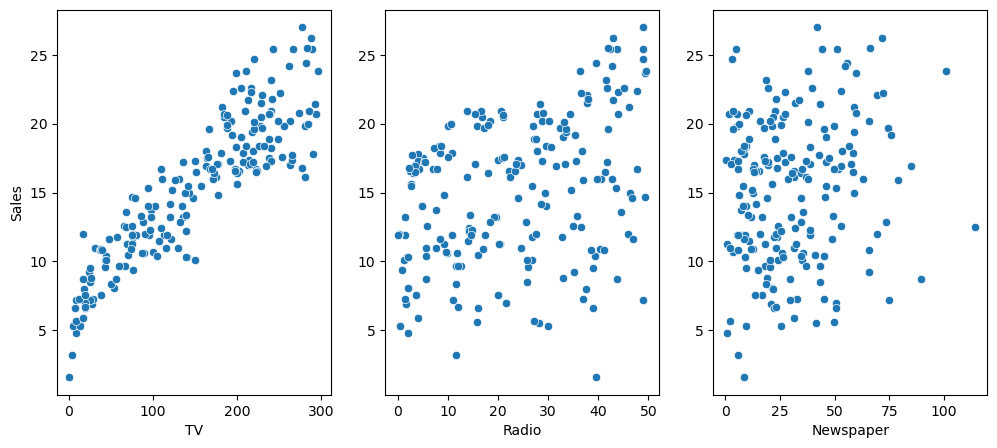

In [25]:
plt.figure(figsize=[12,5])
plt.subplot(1,3,1)
sns.scatterplot(data=advertising,x='TV',y='Sales')

plt.subplot(1,3,2)
sns.scatterplot(data=advertising,x='Radio',y='Sales')
plt.ylabel('')

plt.subplot(1,3,3)
sns.scatterplot(data=advertising,x='Newspaper',y='Sales')
plt.ylabel('')
plt.show()

Step 3: Prediction Analysis

In [53]:
#importing necessary libraries to implement linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
#columns used to train data:
train = advertising[['TV','Radio','Newspaper']]

In [64]:
#columns used to predict data:
test = advertising['Sales']

In [65]:
x_train, x_test, y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=100,train_size=0.7)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [66]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = regr.predict(x_test)
y_pred

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

In [68]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64

In [69]:
regr.score(x_test,y_test)

0.8655979373420272

Model Prediction:

In [72]:
new_data = pd.DataFrame({'TV': [100],'Radio': [150], 'Newspaper': [201]})
new_data

,TV,Radio,Newspaper
0,100,150,201


In [73]:
p_sales = regr.predict(new_data)
p_sales

array([27.48362329])